In [10]:
import geopandas as gpd
import psycopg2  # (if it is postgres/postgis)
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

con = psycopg2.connect(database="postgis-database", user="postgis", password="postgis", host="localhost", port=35432)
sql = "select * from polder3_l1b_bg1 WHERE id=1 "

data = gpd.read_postgis(sql=sql, con=con)
data.head()


,id,timestamp,lon,lat,oad,geom
0,1,2008-07-01,-0.991605,53.9722,0.7253,"POLYGON ((-0.94590 53.97145, -0.94703 53.96621..."


<AxesSubplot:>

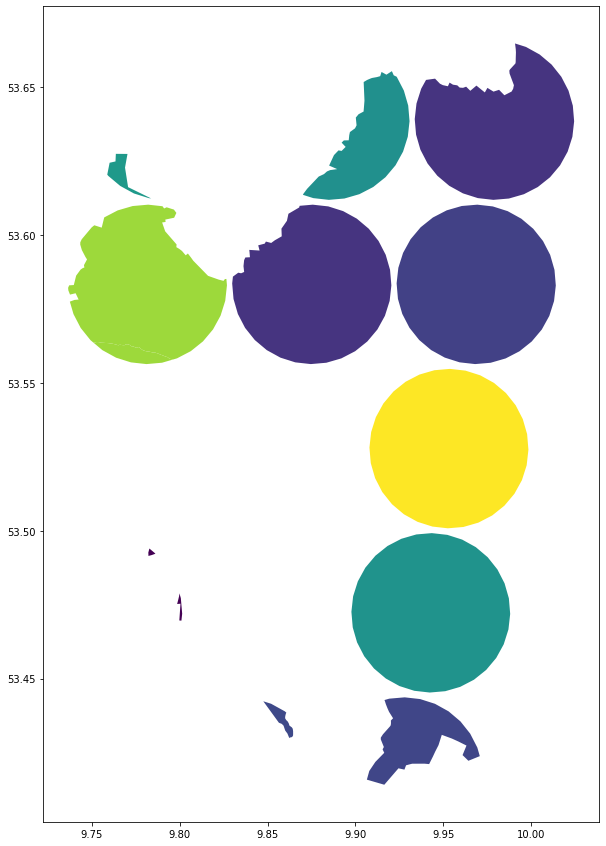

In [53]:
sql="""
    SELECT         
        oad, ST_Intersection(         polder3_l1b_bg1.geom, vg250_krs.geom         )::geometry as geom  
    FROM
        polder3_l1b_bg1,          
        vg250_krs
    WHERE         
    ( gen='Hamburg' )
    AND
        ST_Intersects(polder3_l1b_bg1.geom, vg250_krs.geom)
"""
oad = gpd.read_postgis(sql=sql, con=con)
con.commit()
oad.plot(column='oad', figsize=(20,15))

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

sql="""
    SELECT 
        *
    FROM
        vg250_krs
    """
data_background = gpd.read_postgis(sql=sql, con=con)

In [52]:
data_background.head()

,gid,ade,gf,bsg,rs,ags,sdv_rs,gen,bez,ibz,...,sn_v1,sn_v2,sn_g,fk_s3,nuts,rs_0,ags_0,wsk,debkg_id,geom
0,1,4,4,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,40,...,00,00,000,R,DEF01,010010000000,01001000,2008-01-01,DEBKGDL20000002R,"MULTIPOLYGON (((9.41263 54.82263, 9.41315 54.8..."
1,2,4,4,1,01002,01002,010020000000,Kiel,Kreisfreie Stadt,40,...,00,00,000,R,DEF02,010020000000,01002000,2006-01-01,DEBKGDL20000E43X,"MULTIPOLYGON (((10.16913 54.43138, 10.16954 54..."
2,3,4,4,1,01003,01003,010030000000,Lübeck,Kreisfreie Stadt,40,...,00,00,000,R,DEF03,010030000000,01003000,2006-02-01,DEBKGDL20000DYM9,"MULTIPOLYGON (((10.87682 53.98737, 10.87882 53..."
3,29,4,4,1,03252,03252,032520006006,Hameln-Pyrmont,Landkreis,43,...,00,00,000,K,DE923,032520000000,03252000,2009-01-01,DEBKGDL20000E0TW,"MULTIPOLYGON (((9.46863 52.26533, 9.47103 52.2..."
4,30,4,4,1,03254,03254,032540021021,Hildesheim,Landkreis,43,...,00,00,000,K,DE925,032540000000,03254000,2009-01-01,DEBKGDL20000E6YX,"MULTIPOLYGON (((10.00457 52.29003, 10.00095 52..."


<AxesSubplot:>

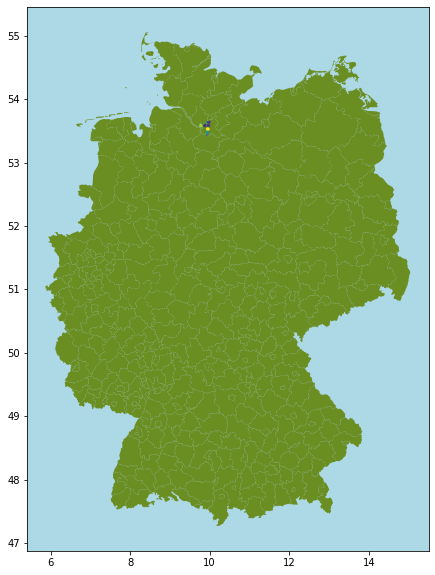

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

# ax.set_ylim([52, 54.5])
# ax.set_xlim([5.0, 10])

ax.set(facecolor = "lightblue") #ocean
ax = oad.plot(column='oad', ax=ax, zorder=2)

data_background.plot(ax=ax, color="olivedrab", zorder=1) #land

In [64]:
sql="""
    SELECT         
        oad, ST_Intersection(         polder3_l1b_bg1.geom, vg250_krs.geom         )::geometry as geom  
    FROM
        polder3_l1b_bg1,          
        vg250_krs
    WHERE         
    ( gen='Verden' )
    AND
        ST_Intersects(polder3_l1b_bg1.geom, vg250_krs.geom)
"""
oad = gpd.read_postgis(sql=sql, con=con)
con.commit()


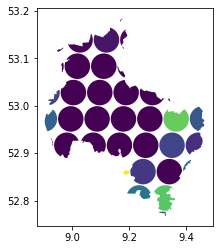

In [70]:
ax = oad.plot(column='oad')

ctx.add_basemap(ax)
oad = oad.to_crs(epsg=3857)


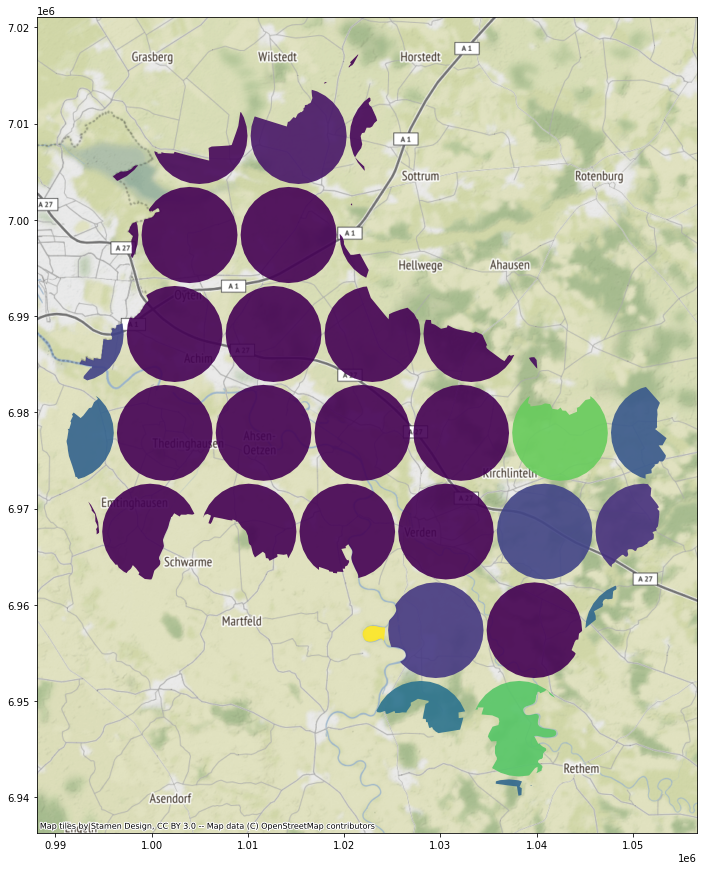

In [71]:
ax = oad.plot(figsize=(15, 15), alpha=0.9, column='oad')
ctx.add_basemap(ax)


In [21]:

con = psycopg2.connect(database="postgis-database", user="postgis", password="postgis", host="localhost", port=35432)
sql = "ST_MemSize(geom::geometry)  from polder3_l1b_bg1 where geom=select select geom from  WHERE id=1 "

data = gpd.read_postgis(sql=sql, con=con)
print(data)

DatabaseError: Execution failed on sql 'ST_MemSize(geom::geometry)  from polder3_l1b_bg1 where geom=select select geom from  WHERE id=1 ': syntax error at or near "ST_MemSize"
LINE 1: ST_MemSize(geom::geometry)  from polder3_l1b_bg1 where geom=...
        ^
